# Tutorial

## Prepare Inputs

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### BCRs input file, BCR_original_emb file, and rna input file
1. Ensure that each file includes an index column labeled "barcode". This column serves as a unique identifier for each cell.
2. Verify that the cells are aligned in the same order across all three files.
3. The BCR file must include the following columns: "fwr1", "cdr1", "cdr2", "fwr2", "cdr3", "fwr3", and "fwr4".

In [16]:
bcr = pd.read_csv("exampledata/example_bcr.csv", index_col="barcode")
rna = pd.read_csv("exampledata/example_rna.csv", index_col="barcode")
assert(bcr.index.tolist() == rna.index.tolist())

In [3]:
bcr.head()

,contig_id,is_cell,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,...,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,sample,label,whole_seq,new_whole_seq,v_identity,SHM
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGCAATAGCAA-1_06,AAACCTGCAATAGCAA-1_contig_1_06,True,True,619,IGH,IGHV2-5,NaN,IGHJ4,IGHG1,True,...,5,clonotype455,clonotype455_consensus_1,1,6,spikepositive,QITLKESGPTLVKPTQTLTLTCTFSGFSLTSGMGVGWIRQPPGKAL...,06:QITLKESGPTLVKPTQTLTLTCTFSGFSLTSGMGVGWIRQPPG...,0.03754,0.061453
AAACCTGCACAACTGT-1_06,AAACCTGCACAACTGT-1_contig_2_06,True,True,537,IGH,IGHV1-24,NaN,IGHJ4,IGHM,True,...,52,clonotype278,clonotype278_consensus_1,1,6,spikepositive,QVQLVQSGAEVKKPGASVKVSCKVSGYTLTELSMHWVRQAPGKGLE...,06:QVQLVQSGAEVKKPGASVKVSCKVSGYTLTELSMHWVRQAPGK...,0.00000,0.008596
AAACCTGCAGCCTGTG-1_06,AAACCTGCAGCCTGTG-1_contig_1_06,True,True,656,IGH,IGHV4-59,IGHD3-22,IGHJ4,IGHG1,True,...,8,clonotype1394,clonotype1394_consensus_1,1,6,spikepositive,QVQLQESGPGLVKPSETLSLICTVSGGSISSYYWSWIRQPAGKGLE...,06:QVQLQESGPGLVKPSETLSLICTVSGGSISSYYWSWIRQPAGK...,0.02397,0.066489
AAACCTGCAGTCAGCC-1_06,AAACCTGCAGTCAGCC-1_contig_2_06,True,True,670,IGH,IGHV1-2,NaN,IGHJ5,IGHG1,True,...,8,clonotype969,clonotype969_consensus_1,1,6,spikepositive,QVQLVQSGAEVKNIGVSVKVSCKASGYTFTDYYIHWVRQAPGQGLE...,06:QVQLVQSGAEVKNIGVSVKVSCKASGYTFTDYYIHWVRQAPGQ...,0.06081,0.095368
AAACCTGGTTCCTCCA-1_06,AAACCTGGTTCCTCCA-1_contig_2_06,True,True,692,IGH,IGHV1-18,IGHD3-22,IGHJ4,IGHG1,True,...,21,clonotype1466,clonotype1466_consensus_1,1,6,spikepositive,QVQLVQSGDEVKKPGASVKVSCEASGYTFISYGIAWVRQAPGQGLE...,06:QVQLVQSGDEVKKPGASVKVSCEASGYTFISYGIAWVRQAPGQ...,0.11576,0.139594


In [4]:
rna.head()

,IGJ,IGLL5,RP11.685N3.1,RP11.731F5.2,CH17.132F21.1,HIST1H4C,UBE2C,DERL3,TUBA1B,MKI67,...,AZI2,HHLA3,BFSP2.AS1,PIK3CA,TARSL2,DIS3,CTD.2256P15.2,ZNF283,FAHD2B,RP11.485G4.2
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGCAATAGCAA-1_06,0.345539,0.411600,-0.086132,-0.151236,0.034590,0.737681,0.000468,0.122183,1.349319,0.002903,...,0.771746,-0.000238,0.000177,0.016492,0.660869,-0.059796,0.012625,0.007151,0.014972,0.026571
AAACCTGCACAACTGT-1_06,0.117444,0.985152,-0.210269,-0.231358,-0.074831,1.304759,-0.003087,0.564784,0.796385,0.000614,...,0.126555,-0.057113,0.000036,0.127062,0.248703,0.093876,0.005728,0.025548,0.009291,-0.002509
AAACCTGCAGCCTGTG-1_06,0.118185,0.304202,1.553921,-0.071504,-0.152440,1.007265,-0.005297,0.122008,1.350721,0.001795,...,0.008371,-0.001826,0.000120,-0.070642,-0.085906,0.005892,-0.018601,0.030213,-0.042815,-0.001975
AAACCTGCAGTCAGCC-1_06,0.123230,1.773176,-0.150341,-0.035437,0.003177,0.666422,0.046367,0.030498,1.141658,0.000546,...,0.069885,-0.079806,0.000041,0.015928,0.099969,0.084648,0.014874,-0.017749,0.041447,0.007477
AAACCTGGTTCCTCCA-1_06,0.162600,0.300888,-0.164492,0.755047,-0.039643,0.022945,0.017033,0.154383,0.842697,0.007529,...,0.025873,0.010463,-0.009411,0.573100,-0.028001,0.097279,0.011172,0.013083,0.161455,-0.006934


### Genreate original BCR embeddings

First, we download the pre-trained BCR encoder


In [1]:
from CoMBCR.utils import download_BCRencoder

download_BCRencoder()

/home/yipingzou2/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 8 files: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]

Download Finished. Path /home/yipingzou2/.local/lib/python3.8/site-packages/CoMBCR/BCRencoder


Please clone or download `runberta.py` from this GitHub repository. This script generates the original BCR embeddings required for computing pairwise BCR distances in the CoMBCR framework. While we recommend using our default pre-trained encoder for optimal performance, any BCR encoder can be used as an alternative.

Run the following command in your terminal:

```bash
python3 runberta.py --datapath "exampledata/example_bcr.csv" --outdir "exampledata" --outfilename "antiberta_embedding.csv"
```

The code generates an original BCR embedding file named "antiberta_embedding.csv" under the outdir.


For this example, we directly use the prepared BCR embedding file provided in the `exampledata` folder, skipping the embedding generation step.

In [4]:
bcrori = pd.read_csv("exampledata/example_bcrori.csv", index_col="barcode")
bcrori.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGCAATAGCAA-1_06,-0.324237,-0.228240,-0.241070,0.951063,-0.688552,-0.024392,-0.455126,-0.142796,0.071060,0.872651,...,0.433799,-0.089641,0.199088,-0.619232,0.433234,-0.507768,0.094147,0.622088,-0.438514,-0.548302
AAACCTGCACAACTGT-1_06,-0.836004,-0.281383,-1.062309,0.253088,-0.613961,0.173742,-0.924163,0.295760,0.215318,0.514034,...,0.113509,0.117395,-0.115959,-0.211876,0.793687,-0.666870,-0.068236,0.275671,0.094568,-0.396323
AAACCTGCAGCCTGTG-1_06,-0.388252,-0.081444,-0.394865,1.480731,-0.288159,-0.132324,-0.263037,-0.209172,0.423102,0.569923,...,-0.231537,-0.353619,0.118815,-1.144104,0.398278,0.067934,-0.181059,0.760884,-0.498049,-0.671089
AAACCTGCAGTCAGCC-1_06,-0.912942,0.000863,0.077432,0.949241,0.020408,0.136745,-0.283928,-0.212797,0.105468,0.711840,...,-0.587940,0.107624,-0.320966,-1.219826,0.783442,0.099214,0.109777,0.096048,-0.420305,-1.142159
AAACCTGGTTCCTCCA-1_06,-0.079208,-0.455230,-0.978580,1.132275,-0.574163,0.258197,-0.157592,-0.350995,0.127573,0.343525,...,0.351599,-0.057017,0.099804,-1.488126,0.658145,0.039580,-0.006186,-0.196100,-0.564170,-0.376476


In [49]:
assert(bcr.index.tolist() == bcrori.index.tolist())

## Run CoMBCR

### Parameters
CoMBCR contains the parameters as follows:

**Required**
1. bcrpath: (Required) The path to the BCR sequences file.
2. rnapath:  (Required) The path to the gene expression file.
3. bcroriginal: (Required) The path to bcr original embedding file.
4. outdir:  (Required) The directory where the best checkpoint file and the output embeddings will be stored.

**Configuration**
1. checkpoint: default is "best_network.pth". This parameter specifies the name of the file where the best model checkpoint will be saved.
2. lr: default is 1e-6. Learning rate.
3. lam: default is 1e-1. Intra-modal constrastive loss weight (α in paper).
4. batch_size: default 256.
5. epochs: default 200.
6. lr_step: default [40,100], These are the milestones for the MultiStepLR setting, which adjusts the learning rate at specified epochs.
7. patience: default 15, the patience for early stopping.
8. save_epoch: default None. If specified (e.g., 150), saves the model at that epoch and exits training. By default, uses early stopping strategy.
9. encoderprofile_in_dim: default 5000. Adjust this parameter if the number of input genes differs from 5000.
10. separatebatch: The default is False. If set to True, BCRs from different samples will be treated as distinct BCRs. Ensure that your BCR input file contains a "sample" column if you choose to enable this option.
11. user_defined_cluster: default False. If set to True, the model utilizes custom cluster labels specified in the 'cluster_label' column of BCR input file for intra-modal contrastive learning; Otherwise, it relies on BCR sequence identity.

### Example

The codes below return numpy arrays for BCR embeddings and gex embeddings. Meanwhile, it will output "bcrembedding.csv" and "gexemedding.csv" under the outdir you designated.  

***Note***: If CUDA raised error, this is due to a crush with the previous loaded model. Please restart the jupyter notebook and directly run the cell below.

In [2]:
from CoMBCR.CoMBCR import CoMBCR_main

bcremb, gexemb = CoMBCR_main(bcrpath="exampledata/example_bcr.csv", 
            rnapath="exampledata/example_rna.csv", 
            bcroriginal="exampledata/example_bcrori.csv", 
            outdir="outputs",
            epochs=1,
            batch_size=16,
            encoderprofile_in_dim=5000)

learning rate is  1e-06
Adjusting learning rate of group 0 to 1.0000e-06.
Epoch:[0/1]	loss:5.66321	loss_cmc:2.770848	loss_p2p:2.889535	loss_b2b:0.002831
Adjusting learning rate of group 0 to 1.0000e-06.


Read the output files "bcrembedding.csv" and "gexembedding.csv" located in the designated output directory.

In [10]:
bcremb = pd.read_csv("outputs/Embeddings/bcrembeddings.csv", index_col="barcode")
gexemb = pd.read_csv("outputs/Embeddings/gexembeddings.csv", index_col="barcode")

In [11]:
bcremb.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGCAATAGCAA-1_06,0.036478,-0.064659,-0.022590,0.057851,-0.005902,0.055995,0.028955,-0.040451,-0.007017,0.018949,...,-0.098369,-0.057449,-0.079806,-0.008940,-0.075818,-0.042437,-0.000268,-0.051810,-0.046501,-0.039475
AAACCTGCACAACTGT-1_06,0.112019,0.043684,0.013138,0.146293,0.001090,0.048783,0.066165,0.003998,-0.047299,0.049436,...,-0.072826,0.023517,-0.005786,-0.012766,-0.051316,-0.015641,0.000868,-0.038674,-0.017231,0.045013
AAACCTGCAGCCTGTG-1_06,0.022707,-0.013461,-0.067622,0.122398,0.002358,0.058527,0.067470,0.075981,0.005535,0.003268,...,-0.158376,0.070778,-0.055076,-0.053472,-0.034038,0.080154,-0.076985,-0.010960,0.028373,-0.000658
AAACCTGCAGTCAGCC-1_06,0.080901,0.051147,-0.057198,0.041402,0.036477,-0.025661,0.112182,0.038439,-0.005015,-0.000577,...,-0.117471,0.039843,0.040215,-0.105794,0.005392,0.051845,0.009122,-0.020035,-0.031484,0.050207
AAACCTGGTTCCTCCA-1_06,0.044941,-0.019187,-0.075216,0.092381,0.002259,0.048907,0.074729,0.012863,-0.027467,0.026431,...,-0.119245,0.029919,-0.029840,-0.044269,-0.012197,0.035645,-0.091599,0.021893,-0.002428,-0.019803


In [12]:
gexemb.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGCAATAGCAA-1_06,-0.021573,-0.033691,0.004217,0.028936,-0.087974,-0.055778,0.098369,0.037285,-0.096020,-0.033442,...,0.024508,-0.030203,0.014148,-0.054257,-0.034545,-0.088043,-0.001699,-0.021251,0.009899,0.075954
AAACCTGCACAACTGT-1_06,0.037666,-0.048839,0.042618,-0.060075,-0.067808,-0.033128,0.106415,-0.024142,-0.066620,0.014075,...,0.012712,-0.056129,0.030238,-0.078705,-0.036855,-0.115017,-0.016965,0.006290,-0.008253,0.078396
AAACCTGCAGCCTGTG-1_06,-0.016831,-0.051655,0.040888,0.018724,-0.050827,-0.061384,0.102052,0.012954,-0.102445,-0.000952,...,0.001558,-0.051830,0.045169,-0.042173,-0.044417,-0.069794,-0.032732,-0.048583,-0.013449,0.043768
AAACCTGCAGTCAGCC-1_06,0.004295,-0.073844,0.023683,-0.001403,-0.049981,-0.069473,0.065608,-0.040711,-0.058234,0.018054,...,-0.033379,-0.093899,0.029489,-0.072178,-0.030340,-0.087772,-0.016268,-0.064988,-0.000102,0.046613
AAACCTGGTTCCTCCA-1_06,0.036133,-0.065867,-0.017213,0.002229,-0.088931,-0.027448,0.080449,0.010207,-0.062596,-0.042247,...,-0.026819,-0.093513,0.030560,-0.038917,-0.049998,-0.063949,0.017147,0.018682,-0.028872,0.034106


## Visualizations

Please install the following packages (and the specified versions) to enable the visualization features:
- anndata (0.9.2)
- scanpy (1.9.8)
- matplotlib (3.6.3)

We provide functions to interpret the optimization performance and visualize the output embeddings.

We used the results under example_outdir directory to show how to visualize the outputs of CoMBCR quickly.

### 📉 Training Loss Analysis

The function `plot_training_loss` interprets and visualizes the model optimization process.

**Key parameters of the function:**
*   `log_path` (required): Path to the training log file generated in your designated output directory (e.g., `'example_outdir/CoMBCR.pth.log'`).
*   `mode` (default: `'earlystopping'`): If you have designated a specific epoch to save, you should set the parameter as `'save_epoch'`.
*   `save_path` (default: `None`): Optional path to save the generated figure. If not specified, the figure will be displayed interactively without saving.

This function plots the **Cross-Modal Loss** ($L_{cross}$), **Profile Loss** ($L_p$), and **BCR Loss** ($L_b$), along with their summation across epochs.

As described in our paper:
*   **$L_{cross}$**: Describes the cross-modal fusion performance.
*   **$L_p$ and $L_b$**: Describe the preservation of intrinsic structural features within the GEX and BCR modalities, respectively.

Users can monitor these curves to verify that the optimization is converging correctly (i.e., the losses are decreasing and stabilizing).

#### Breakdown of Loss Components

*   **1. Cross Loss (The "Alignment" Score)**
    *   **What it means:** This measures how well the model pulls the BCR and GEX representations of the *same cell* together in the latent space.
    *   **Biological interpretation:** A decreasing curve indicates that the model is successfully learning the biological correspondence between BCR sequences and Gene Expression profiles.

*   **2. Profile Loss & BCR Loss (The "Structure" Scores)**
    *   **What it means:** These measure how well the model reconstructs and preserves the original features of GEX and BCR, respectively.
    *   **Biological interpretation:** A decreasing curve indicates that the intrinsic structure is being preserved during the learning process, ensuring the model doesn't just "force" alignment by losing biological detail.

#### Model Selection Strategy
Under the default `earlystopping` strategy during training, the model with the minimum Total Loss ($L_{cross} + L_p + L_b$) is automatically saved. However, users have the flexibility to load models from other epochs if they wish to prioritize a specific metric (e.g., selecting an epoch with a lower Cross Loss to emphasize tighter alignment).

In [1]:
from CoMBCR.visualization import plot_training_loss

/home/yipingzou2/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


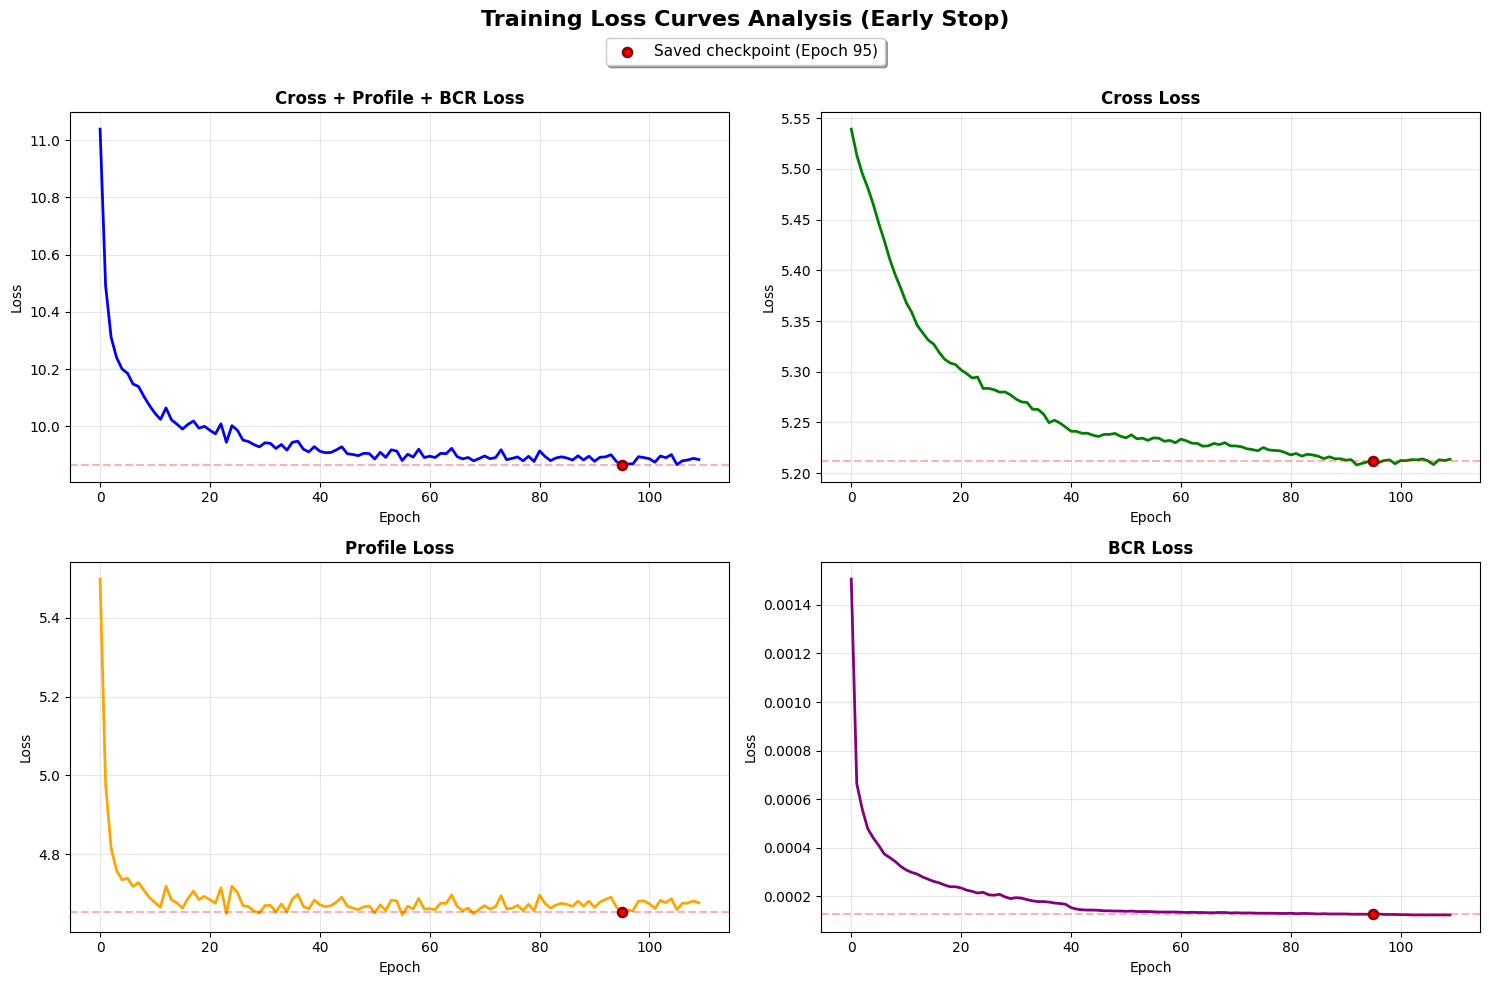

In [2]:
fig = plot_training_loss('example_outdir/CoMBCR.pth.log', mode='earlystopping', save_path=None)

# If users desginiate an epoch to save, they should set mode as 'save_epoch':
# fig = plot_training_loss('example_outdir/CoMBCR.pth.log', mode='save_epoch', save_path=None) 

#### Conclusion from the plot:
As shown in the figure, **all three curves show a steady downward trend and stabilize**, indicating that the optimization worked well. The model has achieved a balance: it aligns the modalities (low Cross Loss) without sacrificing the unique biological information inherent to each modality (low Profile/BCR Loss).

### 🎨 Visualization: Joint & Individual Embeddings

After training, we can visualize the learned representations to verify biological heterogeneity. We provide the `create_joint_embedding_adata` function to consolidate the output embeddings into a standard `AnnData` object, which is fully compatible with **Scanpy**.

#### 1. Load and Construct the AnnData Object

The function `create_joint_embedding_adata` merges the BCR and GEX embeddings with your metadata.

**Key Parameters:**
*   `bcr_emb_path` (str): Path to the generated BCR embedding CSV file.
*   `gex_emb_path` (str): Path to the generated GEX embedding CSV file.
*   `metadata` (str or pd.DataFrame): Path to your annotation file (or a DataFrame). The index should match the barcodes.

**Output Structure:**
The returned `adata` object is structured for flexible analysis:
*   `adata.X`: Stores the **Joint Embeddings**. Use this for clustering and global visualization.
*   `adata.obsm['CoMBCR_bcr']`: Stores the CoMBCR-BCR Embeddings.
*   `adata.obsm['CoMBCR_gex']`: Stores the CoMBCR-GEX Embeddings.


In [4]:
from CoMBCR.visualization import create_joint_embedding_adata
import scanpy as sc
adata = create_joint_embedding_adata(
        bcr_emb_path="example_outdir/Embeddings/bcrembeddings.csv",
        gex_emb_path="example_outdir/Embeddings/gexembeddings.csv",
        metadata="example_outdir/annotation.csv"
    )

Loading embeddings...
Concatenating embeddings...
Normalizing joint embeddings...
Creating AnnData object...
Storing separate embeddings in layers...
Adding metadata...
Computing neighbor graph for Joint embedding ...
Computing UMAP for Joint embedding ...


#### 2. Visualize the Joint Embedding Space

Since `adata.X` contains the joint embeddings, we can directly apply the standard Scanpy workflow to visualize the co-embedded space. 


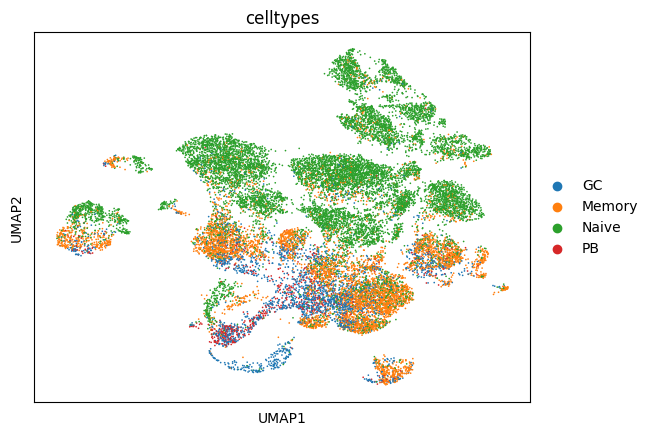

In [11]:
sc.pl.umap(adata, color="celltypes")

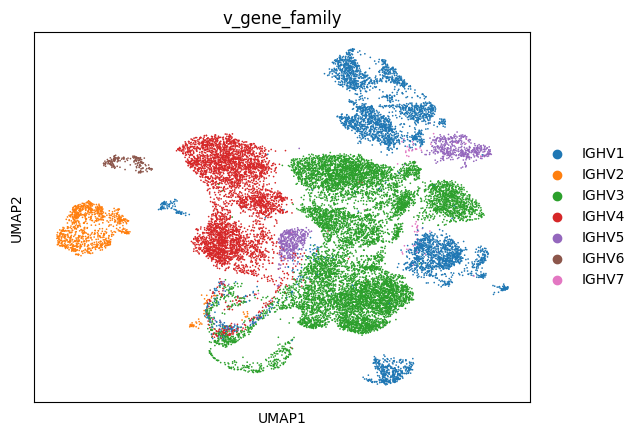

In [12]:
sc.pl.umap(adata, color="v_gene_family")

#### 3.Visualize CoMBCR's Individual Modalities

Sometimes, users may want to inspect CoMBCR-BCR embeddings or CoMBCR-GEX embeddings. We provide `create_sub_embedding_adatas` to extract the modality-specific embeddings stored in `.obsm` into separate AnnData objects.


In [13]:
from CoMBCR.visualization import create_sub_embedding_adatas
bcr_adata, gex_adata = create_sub_embedding_adatas(adata)

Creating BCR AnnData...
Creating GEX AnnData...
Computing neighbor graph for BCR embedding ...
Computing neighbor graph for GEX embedding ...
Computing UMAP for BCR embedding...
Computing UMAP for GEX embedding...
Done!


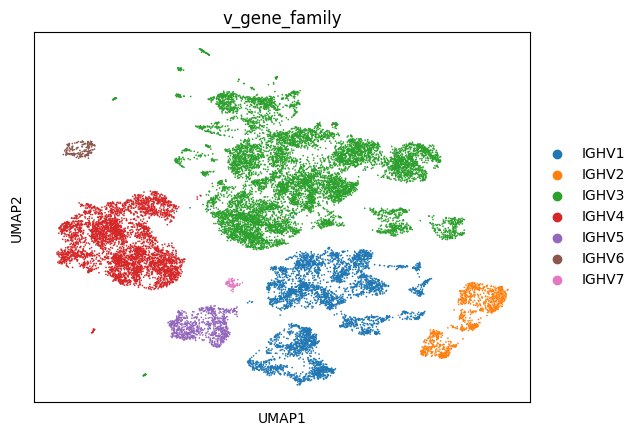

In [14]:
sc.pl.umap(bcr_adata, color='v_gene_family')

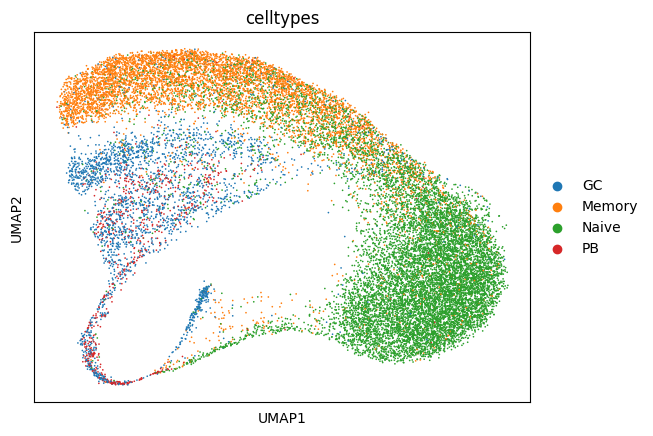

In [15]:
sc.pl.umap(gex_adata, color='celltypes')